In [118]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import warnings 
 
warnings.filterwarnings('ignore') 

## Bussiness Understanding

* Memprediksi credit risk berdasarkan data yang diberikan
* Membuat model untuk melakukan klasifikasi biner

## Read Data

In [119]:
df = pd.read_csv("loan_data_2007_2014.csv")
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df.shape 

(466285, 75)

Terdapat 75 Variabel dan 466285 baris pada data yang diberikan

## Preprocessing Data

### Variabel Respon
Pada project ini, variabel respon adalah variabel loan_status.

In [121]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Pada variabel loan_status, terdapat 9 kategori. Pada project ini 9 kategori tersebut akan diubah menjadi tiga kategori yaitu kategori good_loan, bad_loan dan undetachable_loan.

good_loan (1):

* Fully Paid
* Does not meet the credit policy. Status:Fully Paid

bad_debt (0):

* Charged off
* Default
* Late (31-120 days)
* Late (16-30 days)
* Does not meet the credit policy. Status:Charged Off

undetachable_loan (-1):

* Current
* In Grace Period

Kategori yang akan digunakan adalah kategori good_loan dan bad_loan untuk klasifikasi biner. Sementara itu baris dengan kategori undetachable_loan akan dihapus.

In [122]:
target_dict = {'Fully Paid':1,
               'Does not meet the credit policy. Status:Fully Paid':1,
               'Charged Off':0,
               'Does not meet the credit policy. Status:Charged Off':0,
               'Default':0,
               'Late (31-120 days)':0,
               'Current':-1,
               'In Grace Period':-1,
               'Late (16-30 days)':0}
#Membuat kategori baru
df['loan_status'] = df['loan_status'].map(target_dict)

In [123]:
df["loan_status"].head()

0    1
1    0
2    1
3    1
4   -1
Name: loan_status, dtype: int64

In [124]:
df = df.loc[~df['loan_status'].isin([-1])].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238913 entries, 0 to 238912
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   238913 non-null  int64  
 1   id                           238913 non-null  int64  
 2   member_id                    238913 non-null  int64  
 3   loan_amnt                    238913 non-null  int64  
 4   funded_amnt                  238913 non-null  int64  
 5   funded_amnt_inv              238913 non-null  float64
 6   term                         238913 non-null  object 
 7   int_rate                     238913 non-null  float64
 8   installment                  238913 non-null  float64
 9   grade                        238913 non-null  object 
 10  sub_grade                    238913 non-null  object 
 11  emp_title                    225435 non-null  object 
 12  emp_length                   229688 non-null  object 
 13 

In [125]:
df.shape

(238913, 75)

Setelah dilakukan penghapusan baris yang memiliki nilai -1 pada variabel loan_status, jumlah baris berkurang menjadi 238913

##### Persentase dan Countplot dari Variabel Respon

In [126]:
dfg = df.groupby('loan_status').agg({'id':'count'}).reset_index()
dfg.columns = ['loan_status','total']
dfg['%'] = round(dfg['total']*100/sum(dfg['total']),3)
dfg

,loan_status,total,%
0,0,52186,21.843
1,1,186727,78.157


<Axes: xlabel='count', ylabel='loan_status'>

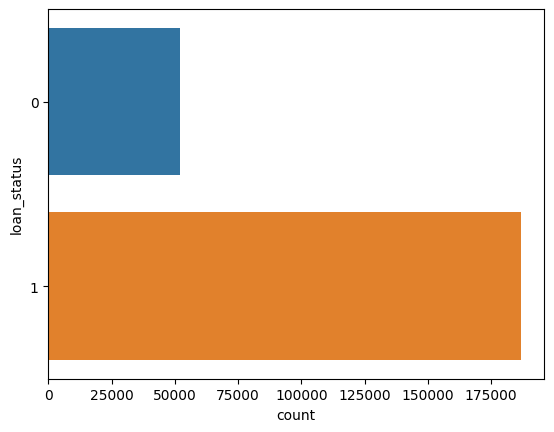

In [127]:
sns.countplot(y=df["loan_status"])

### Menghapus variabel yang memiliki missing value 100 persen

In [128]:
nullpercent =  pd.DataFrame((df.isna().sum()/238913)*100).reset_index()
nullpercent.rename(columns = {"index":"Column Name", 0:"Percentage"}, inplace = True)
nullpercent[nullpercent["Percentage"]>=50]

,Column Name,Percentage
20,desc,61.431986
29,mths_since_last_delinq,55.889801
30,mths_since_last_record,87.883037
48,next_pymnt_d,95.103238
51,mths_since_last_major_derog,82.192681
54,annual_inc_joint,100.000000
55,dti_joint,100.000000
56,verification_status_joint,100.000000
60,open_acc_6m,100.000000
61,open_il_6m,100.000000


In [129]:
drop1 = nullpercent[nullpercent["Percentage"]==100]
df.drop(columns=drop1["Column Name"],  inplace=True)

In [130]:
df.shape

(238913, 58)

Setelah dilakukan drop, jumlah variable yang tersisa adalah 58

In [131]:
cat = df.select_dtypes(include=object).columns
num = df.select_dtypes(exclude=object).columns

### Categorical Variables

In [132]:
df[cat].describe().transpose()

,count,unique,top,freq
term,238913,2,36 months,186469
grade,238913,7,B,72239
sub_grade,238913,35,B3,17375
emp_title,225435,129889,Teacher,1652
emp_length,229688,11,10+ years,71312
home_ownership,238913,6,MORTGAGE,117376
verification_status,238913,3,Verified,88823
issue_d,238913,91,Oct-14,9884
pymnt_plan,238913,2,n,238906
url,238913,238913,https://www.lendingclub.com/browse/loanDetail....,1


Variabel emp_title, url, desc, title, zip_code, addr_state tidak akan digunakan karena memiliki terlalu banyak nilai yang unik. Selain itu, variable application type tidak akan digunakan karena hanya memiliki satu nilai yang unik.

In [133]:
df.drop(columns=['emp_title','url','desc','title','zip_code','addr_state','application_type'], inplace=True)

### Datetime settings

In [134]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'],format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],format='%b-%y')

In [135]:
df[["earliest_cr_line", "issue_d", "last_credit_pull_d","last_pymnt_d"]].head()

,earliest_cr_line,issue_d,last_credit_pull_d,last_pymnt_d
0,1985-01-01,2011-12-01,2016-01-01,2015-01-01
1,1999-04-01,2011-12-01,2013-09-01,2013-04-01
2,2001-11-01,2011-12-01,2016-01-01,2014-06-01
3,1996-02-01,2011-12-01,2015-01-01,2015-01-01
4,2004-11-01,2011-12-01,2015-09-01,2015-01-01


Selanjutnya akan dibuat variabel baru pymnt_time dan credit_pull_year.
* Variabel pymnt_time adalah selisih bulan antara issue_d dengan last_payment_d
* Variabel credit_pull_year adalah selisih tahun antara earliest_cr_line dengan last_credit_pull_d

In [136]:
def diff_year(d1, d2):
    return (d1.year - d2.year)

def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [137]:
df['pymnt_time'] = df.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1)
df['credit_pull_year'] = df.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1)

In [138]:
df[["pymnt_time", "credit_pull_year"]].head()

,pymnt_time,credit_pull_year
0,37.0,31.0
1,16.0,14.0
2,30.0,15.0
3,37.0,19.0
4,37.0,11.0


Setelah ini variabel earliest_cr_line, issue_d, last_credit_pull_d, next_pymnt_d, dan last_pymnt_d tidak akan digunakan lagi.


In [139]:
df.drop(columns=["earliest_cr_line", "issue_d", "last_credit_pull_d","last_pymnt_d", "next_pymnt_d" ], inplace=True)

In [140]:
cat2 = df.select_dtypes(include=object).columns

In [141]:
for column in df[cat2].columns:
    print(column, "\n")
    print(df[column].value_counts(),"\n")

term 

 36 months    186469
 60 months     52444
Name: term, dtype: int64 

grade 

B    72239
C    61042
A    39500
D    38715
E    18086
F     7348
G     1983
Name: grade, dtype: int64 

sub_grade 

B3    17375
B4    16126
C1    14012
B2    13927
B5    13414
C2    13377
C3    11923
B1    11397
C4    11232
A5    11101
C5    10498
A4    10380
D1     9529
D2     8713
D3     7613
D4     7048
A3     6753
D5     5812
A2     5765
A1     5501
E1     4370
E2     4344
E3     3541
E4     3151
E5     2680
F1     2107
F2     1684
F3     1509
F4     1143
F5      905
G1      670
G2      481
G3      332
G4      259
G5      241
Name: sub_grade, dtype: int64 

emp_length 

10+ years    71312
2 years      22352
< 1 year     19998
3 years      19395
5 years      17297
1 year       16078
4 years      15402
6 years      14300
7 years      13466
8 years      11092
9 years       8996
Name: emp_length, dtype: int64 

home_ownership 

MORTGAGE    117376
RENT        101186
OWN          20123
OTHER          179

Tinjau variabel home_ownership

In [142]:
df["home_ownership"].value_counts()

MORTGAGE    117376
RENT        101186
OWN          20123
OTHER          179
NONE            48
ANY              1
Name: home_ownership, dtype: int64

Terlihat pada variabel home_ownership terdapat kategori other, none, dan any. Ketiga kategori tersebut akan dihapus dan diubah menjadi NA

In [143]:
df["home_ownership"].replace({'OTHER':np.NAN, 'NONE':np.NAN, 'ANY':np.NAN}, inplace=True)

Tinjau variabel grade dan sub grade

Karena variabel grade dan sub grade memiliki makna yang sama maka hanya salah satu yang akan digunakan, yaitu variabel grade.

In [144]:
df.drop(columns="sub_grade", inplace=True)

### Numerical variables

In [145]:
df[num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,238913.0,1.956114e+05,1.337319e+05,0.00,8.301400e+04,1.832350e+05,296533.00,4.662830e+05
id,238913.0,8.584147e+06,9.288258e+06,54734.00,1.382529e+06,5.524581e+06,12485970.00,3.785416e+07
member_id,238913.0,9.703611e+06,1.007888e+07,70473.00,1.616779e+06,6.479428e+06,14457393.00,4.061688e+07
loan_amnt,238913.0,1.348621e+04,8.066725e+03,500.00,7.200000e+03,1.200000e+04,18000.00,3.500000e+04
funded_amnt,238913.0,1.344080e+04,8.042190e+03,500.00,7.200000e+03,1.200000e+04,18000.00,3.500000e+04
funded_amnt_inv,238913.0,1.331266e+04,8.080099e+03,0.00,7.125000e+03,1.191431e+04,18000.00,3.500000e+04
int_rate,238913.0,1.385545e+01,4.380770e+00,5.42,1.099000e+01,1.367000e+01,16.59,2.606000e+01
installment,238913.0,4.169350e+02,2.437504e+02,15.67,2.394100e+02,3.652300e+02,545.96,1.408130e+03
annual_inc,238909.0,7.192866e+04,5.510420e+04,1896.00,4.500000e+04,6.145000e+04,86000.00,7.141778e+06
loan_status,238913.0,7.815690e-01,4.131823e-01,0.00,1.000000e+00,1.000000e+00,1.00,1.000000e+00


Dari summary di atas, dapat dilihat bahwa terdapat variabel yang tidak diperlukan.
* Unnamed: 0: Tidak diperlukan karena tidak ada keterangan mengenai varaibel tersebut
* member_id: variabel member_id tidak diperlukan karena sudah ada variabel id
* policy_code: variabel ini tidak diperlukan karena hanya memiliki 1 nilai saja.

Selanjutnya ketiga variabel tersebut akan dihapus

In [146]:
df.drop(columns=["Unnamed: 0", "member_id", "policy_code"], inplace=True)

### Check duplicates

In [147]:
df.duplicated().sum()

0

Terlihat bahwa tidak terdapat data yang terduplikat pada dataset ini

## Exploratory Data Analysis

In [148]:
df1 = df.copy() 
df.shape

(238913, 44)

### Categorical Features

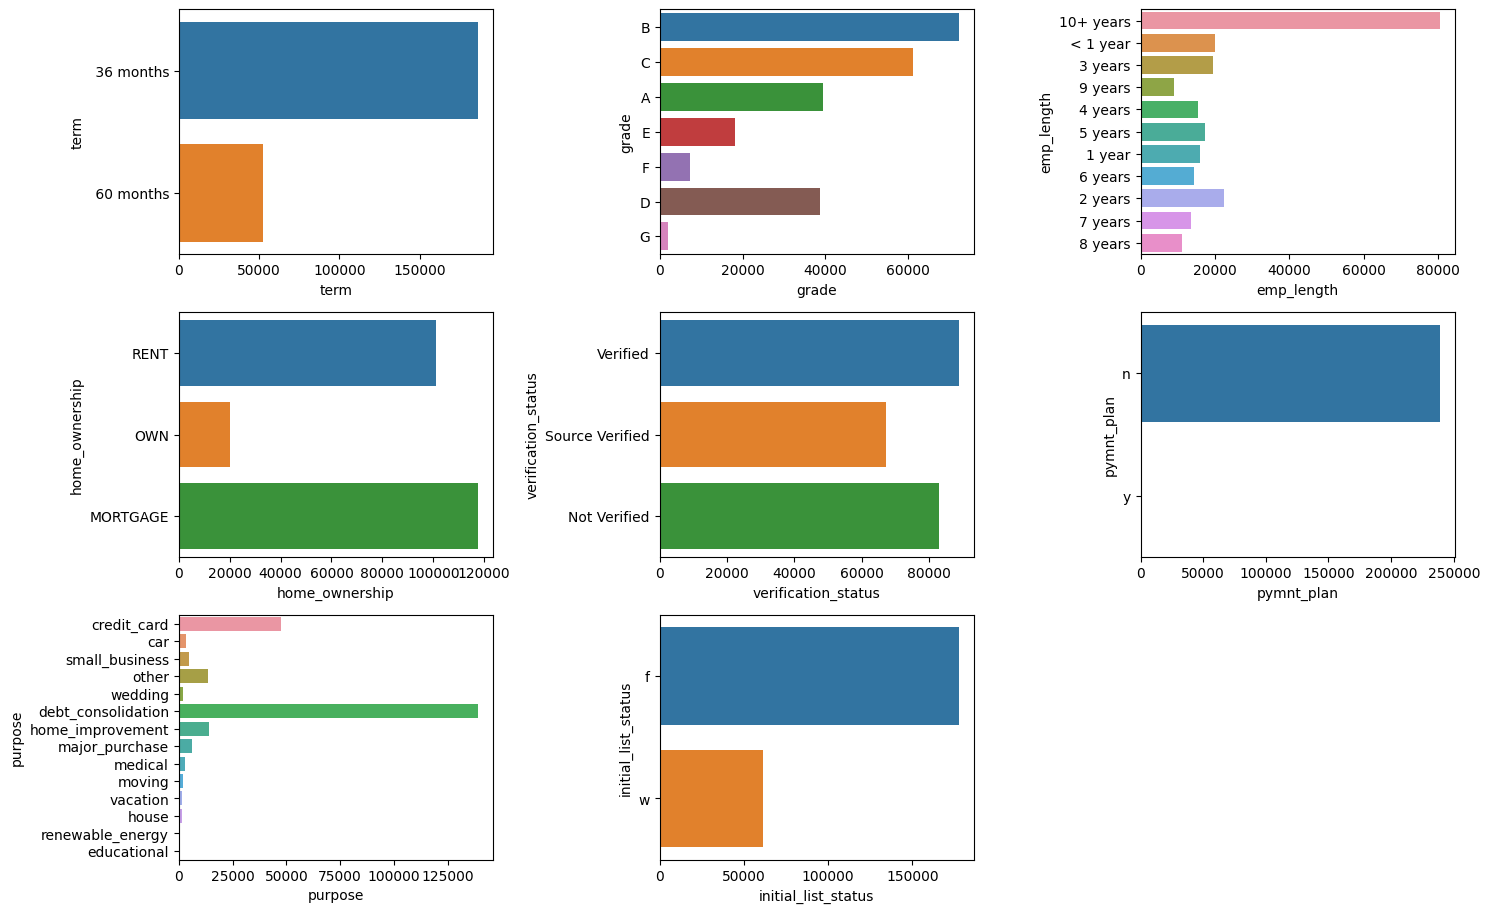

In [235]:
cat3 = df1.select_dtypes(include=object).columns
plt.figure(figsize=(15,30))
for i in range(0, len(cat3)):
    plt.subplot(10, 3, i+1)
    sns.countplot(y=df1[cat3[i]])
    plt.xlabel(cat3[i])
    plt.tight_layout()

#### Features Term

<Axes: xlabel='count', ylabel='term'>

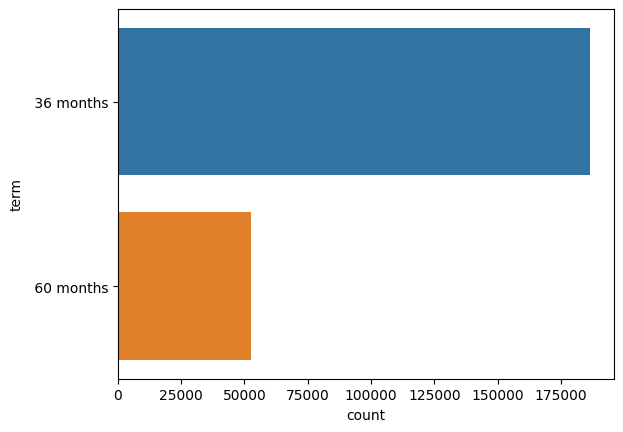

In [150]:
sns.countplot(y=df1["term"])

Terlihat pada features term, kategori 36 months lebih banyak dibandingkan kategori 60 months

#### Features Grade

<Axes: xlabel='count', ylabel='grade'>

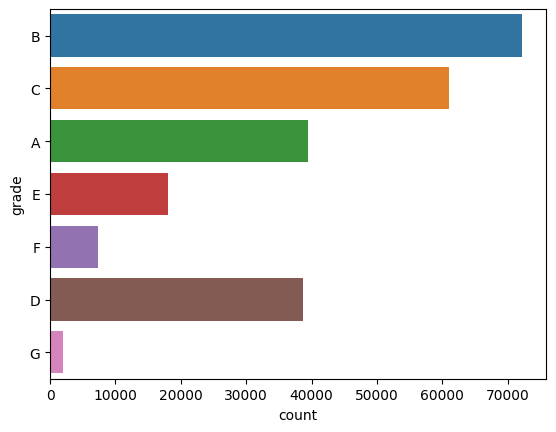

In [151]:
sns.countplot(y=df1["grade"])

Pada countplot variabel grade di atas, dapat dilihat bahwa kategori dengan jumlah paling banyak adalah kategori "B" disusul dengan kategori "C", "A", "D", "E", "F", dan "G". Terdapat perbedaan jumlah yang cukup besar antara kategori "B" dan "G". 

##### Feature emp_length

<Axes: xlabel='count', ylabel='emp_length'>

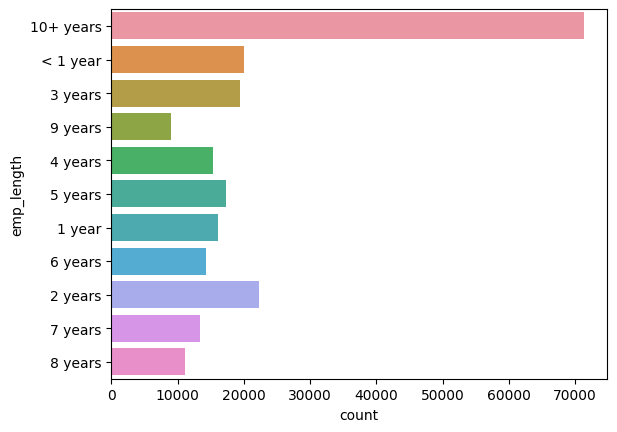

In [153]:
sns.countplot(y=df1["emp_length"])

Dari countplot variabel emp_length diatas, dapat dilihat bahwa sebagian besar peminjam telah bekerja lebih dari 10 tahun.

#### Feature home ownership

<Axes: xlabel='count', ylabel='home_ownership'>

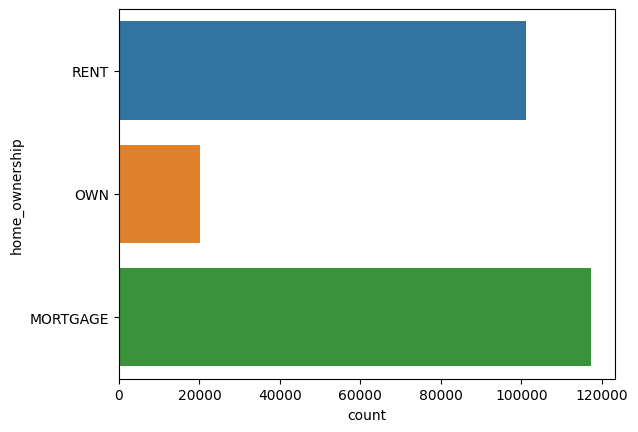

In [154]:
sns.countplot(y=df1["home_ownership"])

#### Feature verification status

<Axes: xlabel='count', ylabel='verification_status'>

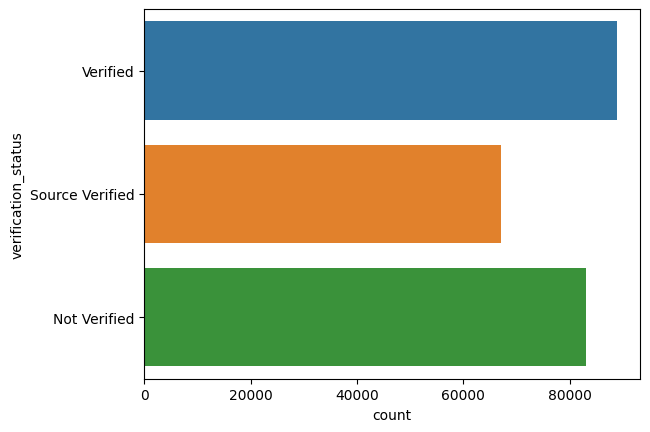

In [155]:
sns.countplot(y=df1["verification_status"])

#### Feature pymnt_pln

<Axes: xlabel='count', ylabel='pymnt_plan'>

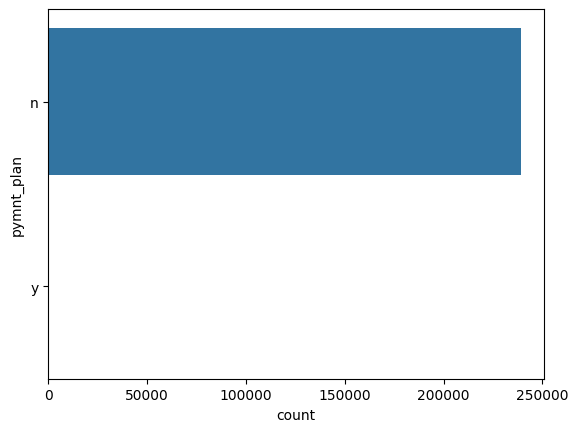

In [156]:
sns.countplot(y=df1["pymnt_plan"])

#### Feature purpose

<Axes: xlabel='count', ylabel='purpose'>

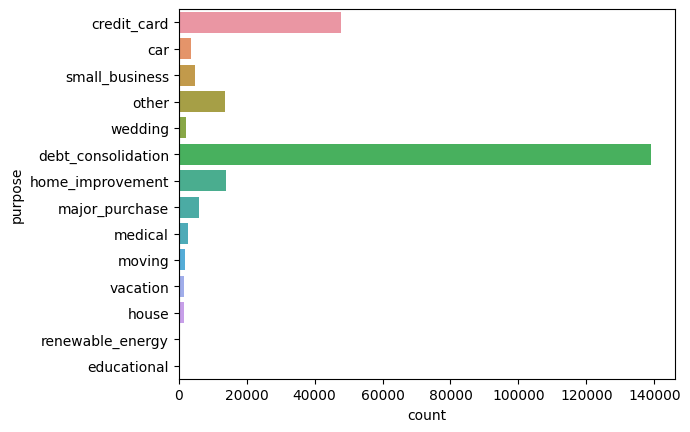

In [157]:
sns.countplot(y=df1["purpose"])

#### Feature initial list status

<Axes: xlabel='count', ylabel='initial_list_status'>

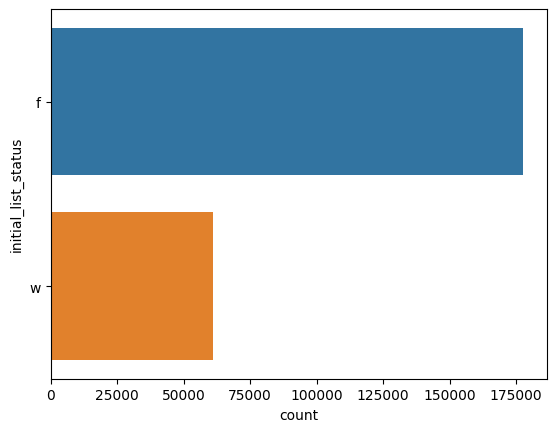

In [158]:
sns.countplot(y=df1["initial_list_status"])

### Numerical Features

In [159]:
num2=df.select_dtypes(exclude=object).columns

In [160]:
num2

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'pymnt_time', 'credit_pull_year'],
      dtype='object')

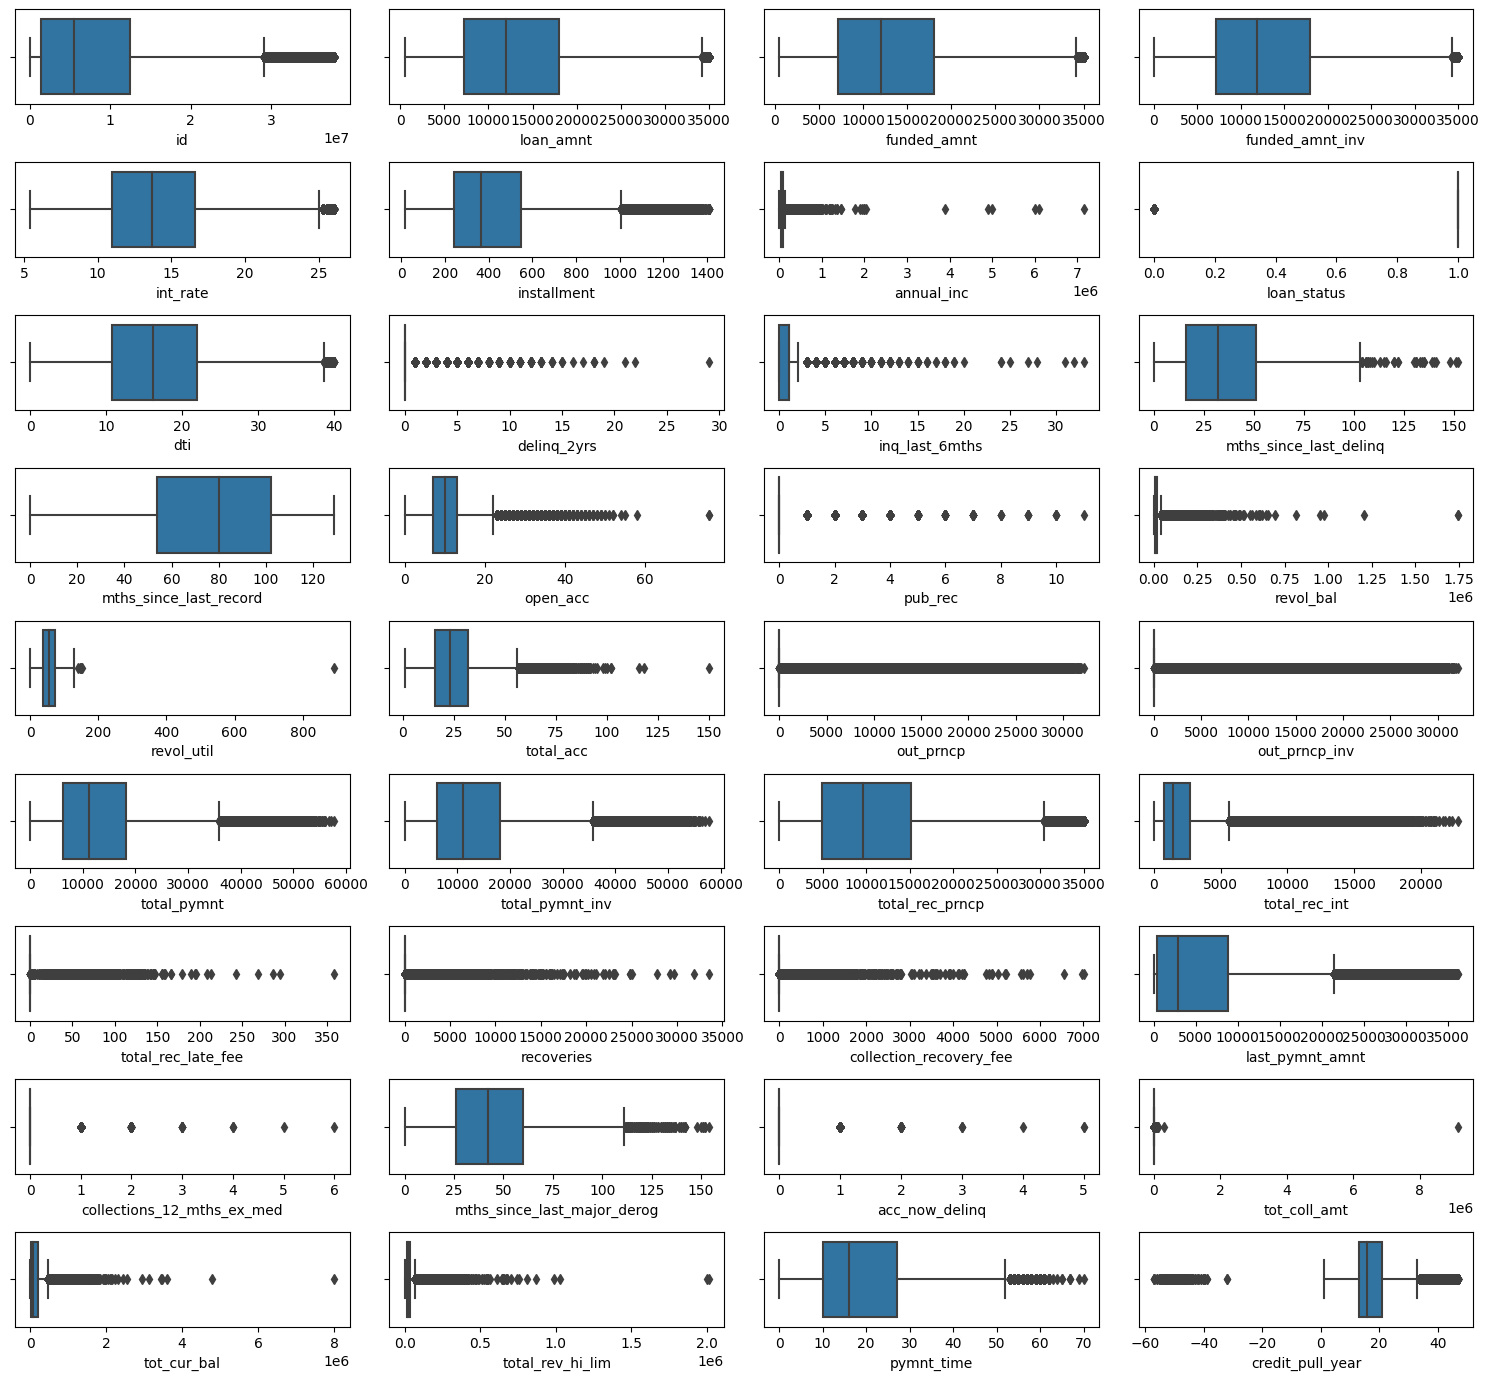

In [161]:
plt.figure(figsize=(15,15))
for i in range(0, len(num2)):
    plt.subplot(10, 4, i+1)
    sns.boxplot(x=df1[num2[i]])
    plt.xlabel(num2[i])
    plt.tight_layout()

Terlihat pada sebagian besar features terdapat outliers. Hal ini menandakan bahwa sebagian besar data tidak terdistribusi normal

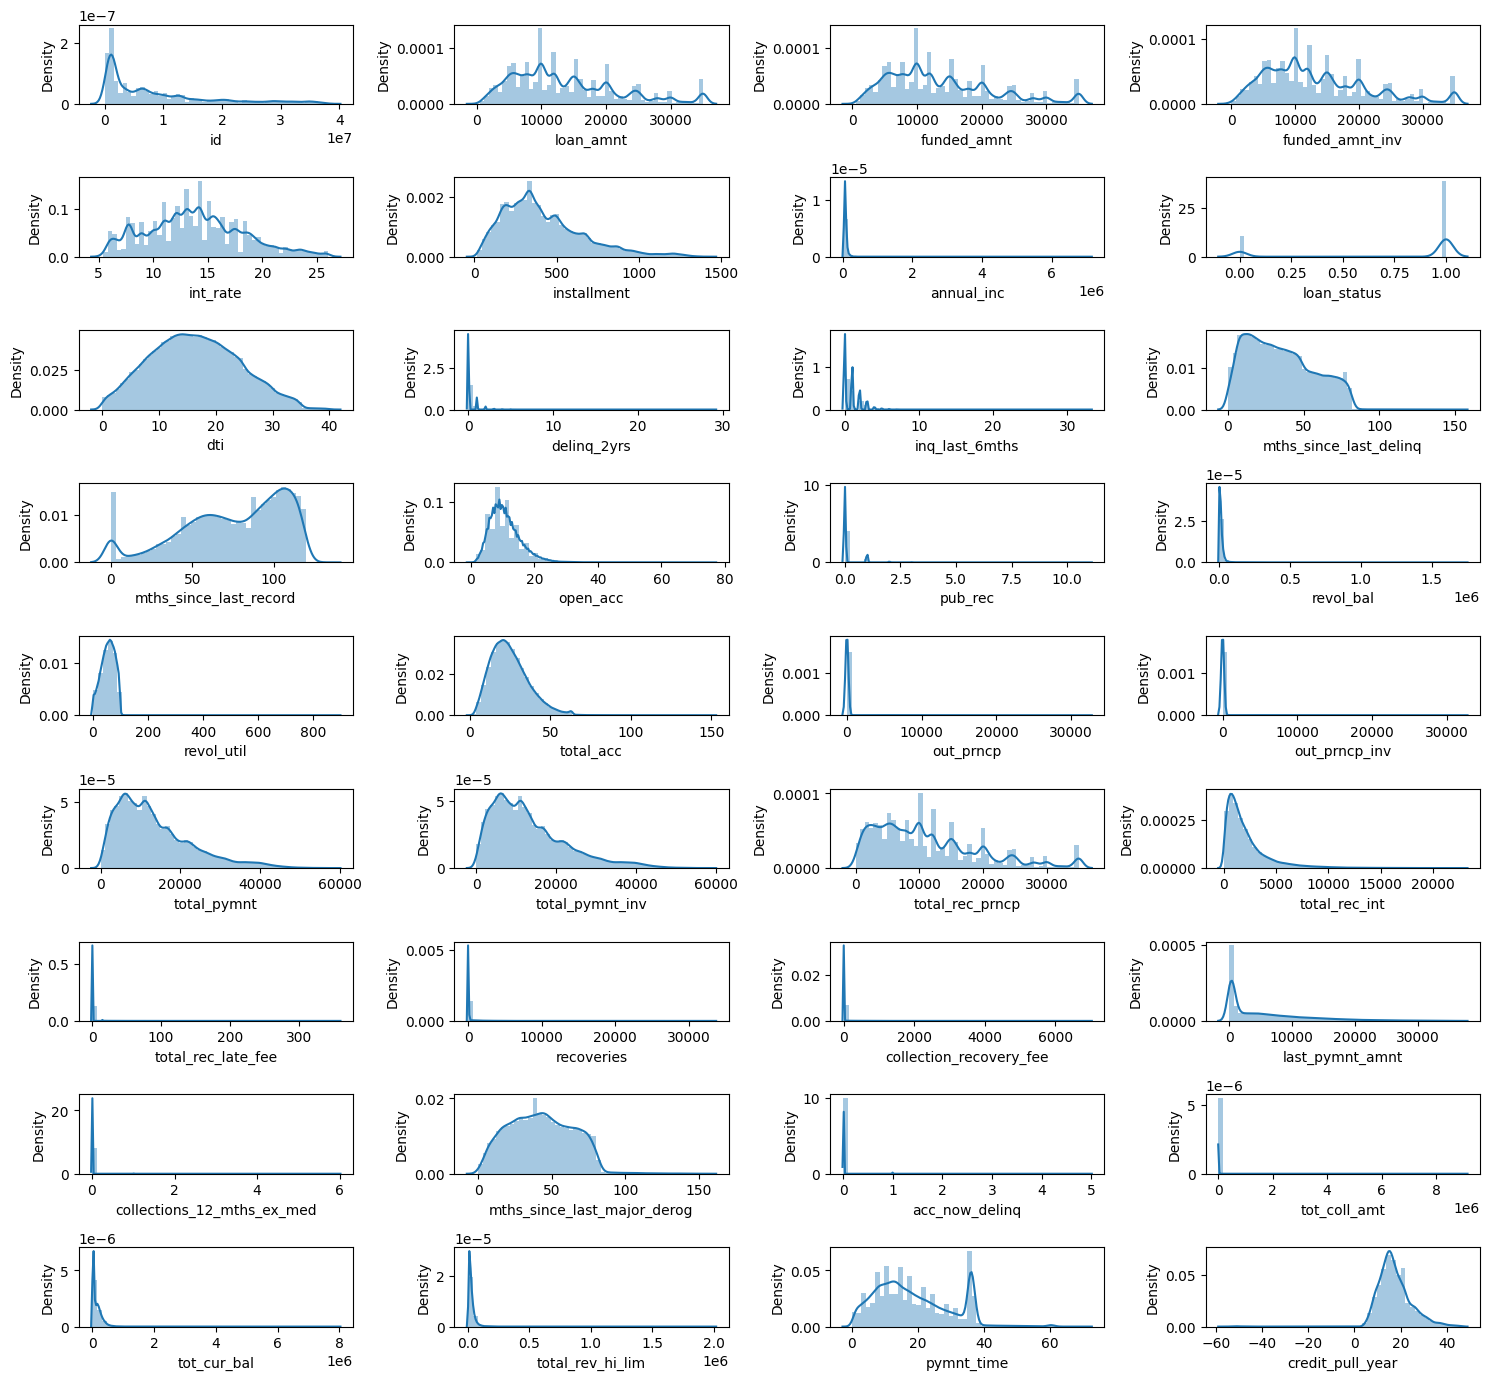

In [162]:
plt.figure(figsize=(15,15))
for i in range(0, len(num2)):
    plt.subplot(10, 4, i+1)
    sns.distplot(x=df1[num2[i]])
    plt.xlabel(num2[i])
    plt.tight_layout()

#### Correlation Plot

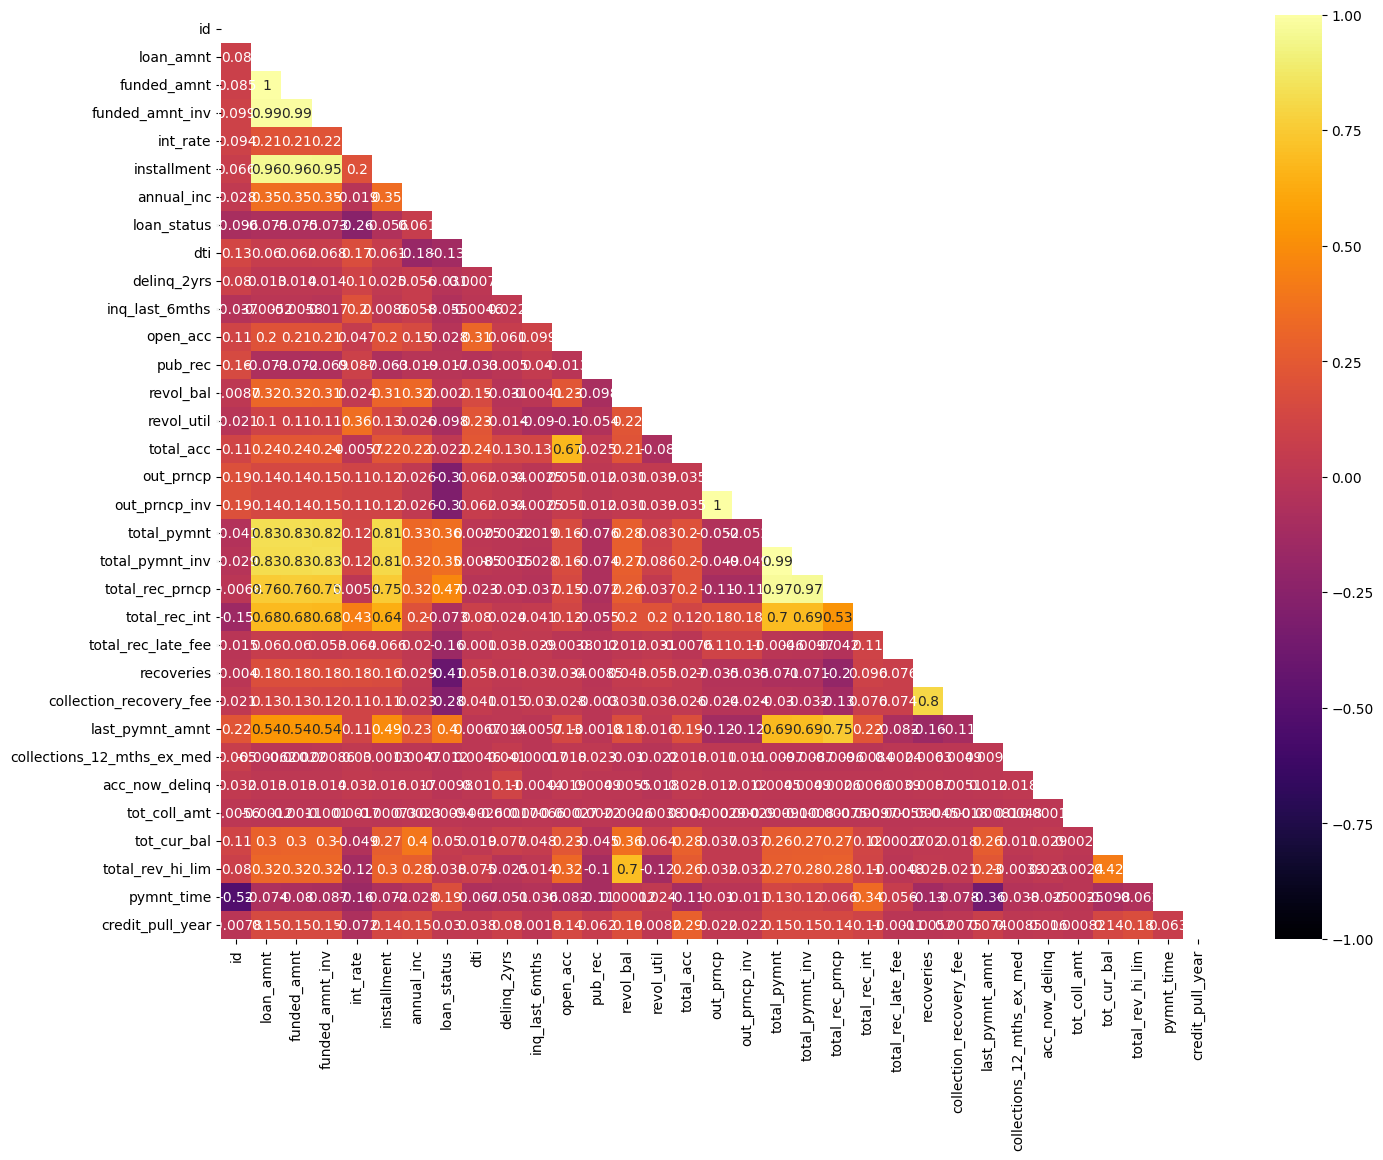

In [254]:
plt.figure(figsize=(16, 12))
mask=np.triu(np.ones_like(df1[num3].corr(), dtype=bool))
correlation_plot=sns.heatmap(df1[num3].corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='inferno', mask=mask)

## Cleaning Data

#### Menghapus variabel dengan persentase missing value lebih dari 50%

In [163]:
nullpercent2 =  pd.DataFrame((df1.isna().sum()/df1.shape[0])*100).reset_index()
nullpercent2.rename(columns = {"index":"Column Name", 0:"Percentage"}, inplace = True)
nullpercent2.sort_values(by="Percentage", ascending=False)

,Column Name,Percentage
19,mths_since_last_record,87.883037
37,mths_since_last_major_derog,82.192681
18,mths_since_last_delinq,55.889801
41,total_rev_hi_lim,27.885883
40,tot_cur_bal,27.885883
39,tot_coll_amt,27.885883
8,emp_length,3.861238
42,pymnt_time,0.157379
23,revol_util,0.097106
9,home_ownership,0.095432


Terlihat variabel mths_since_last_record, mths_since_last_major_derog, mths_since_last_delinq memiliki persentase NA yang lebih besar dari 50 %. Karena persentase tersebut sangat besat maka ketiga variabel tersebut akan dihapus

In [164]:
df1.drop(columns=["mths_since_last_record", "mths_since_last_major_derog", "mths_since_last_delinq"],inplace=True)

### Imputing null values

Untuk melakukan pengisian terhadap missing value akan dibagi menjadi 2, yaitu
* Pengisian missing value untuk variabel numerik akan diisi menguunakan median. Hal ini dikarenakan data yang memiliki outliers dan tidak berdistribusi normal
* Pengisian missing value untuk variabel kategorik akan diisi menggunakan modus.

Pengecekan total missing value pada dataset yang masih tersisa

In [165]:
df1.isna().sum().sum()

210304

Variabel-variabel yang memiliki missing value

In [166]:
nullpercent3 = pd.DataFrame((df1.isna().sum()/df1.shape[0])*100).reset_index()
nullpercent3 = nullpercent2[nullpercent2["Percentage"]>0]
nullpercent3 = nullpercent3[nullpercent3["Percentage"]<50].sort_values(by="Percentage", ascending=False)
nullpercent3 

,Column Name,Percentage
39,tot_coll_amt,27.885883
40,tot_cur_bal,27.885883
41,total_rev_hi_lim,27.885883
8,emp_length,3.861238
42,pymnt_time,0.157379
23,revol_util,0.097106
9,home_ownership,0.095432
36,collections_12_mths_ex_med,0.060692
43,credit_pull_year,0.021347
16,delinq_2yrs,0.012138


In [167]:
column_with_missing_value = np.array(nullpercent3["Column Name"])
len(column_with_missing_value)

16

#### Impute for numerical features

Pengisian missing value untuk variabel numerik

In [168]:
num3=df1.select_dtypes(exclude=object).columns

Variabel-variabel numerik yang memiliki missing value

In [169]:
num_nullpercent =  pd.DataFrame((df1[num3].isna().sum()/df1[num3].shape[0])*100).reset_index()
num_nullpercent.rename(columns = {"index":"Column Name", 0:"Percentage"}, inplace = True)
num_nullpercent[num_nullpercent["Percentage"]>0]

,Column Name,Percentage
6,annual_inc,0.001674
9,delinq_2yrs,0.012138
10,inq_last_6mths,0.012138
11,open_acc,0.012138
12,pub_rec,0.012138
14,revol_util,0.097106
15,total_acc,0.012138
26,collections_12_mths_ex_med,0.060692
27,acc_now_delinq,0.012138
28,tot_coll_amt,27.885883


Terlihat pada tabel di atas, bahwa terdapat 14 variabel yang memiliki missing value. 

In [170]:
num_column_with_missing_value = num_nullpercent[num_nullpercent["Percentage"]>0]
num_column_with_missing_value = np.array(num_column_with_missing_value["Column Name"] )

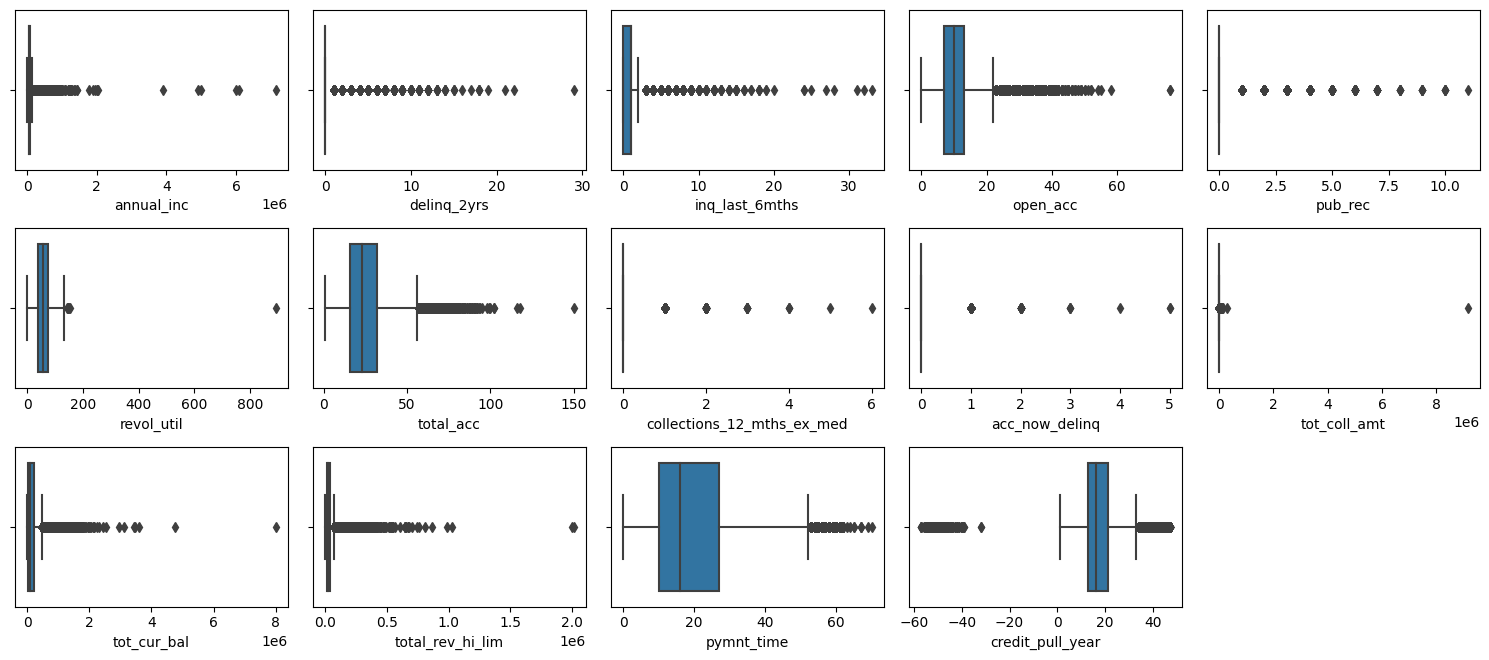

In [171]:
plt.figure(figsize=(15,15))
for i in range(0, len(num_column_with_missing_value)):
    plt.subplot(7, 5, i+1)
    sns.boxplot(x=df1[num_column_with_missing_value[i]])
    plt.xlabel(num_column_with_missing_value[i])
    plt.tight_layout()

Terlihat sebagian besar variabel memiliki outliers sehingga akan dilakukan pengisian missing value menggunakan median.

In [172]:
for i in num_column_with_missing_value:
    df1[i].fillna(df1[i].median(), inplace=True)

In [173]:
df1[num3].isna().sum().sum()

0

Semua missing value telah diisi oleh median dari masing-masing variabel dan jumlah dari missing value untuk variabel numerik telah menjadi 0

#### Impute for categorical features

In [174]:
cat3 = df1.select_dtypes(include=object).columns

In [175]:
cat_nullpercent =  pd.DataFrame((df1[cat3].isna().sum()/df1[cat3].shape[0])*100).reset_index()
cat_nullpercent.rename(columns = {"index":"Column Name", 0:"Percentage"}, inplace = True)
cat_nullpercent[cat_nullpercent["Percentage"]>0]

,Column Name,Percentage
2,emp_length,3.861238
3,home_ownership,0.095432


In [176]:
cat_column_with_missing_value = cat_nullpercent[cat_nullpercent["Percentage"]>0]
cat_column_with_missing_value = np.array(cat_column_with_missing_value["Column Name"] )

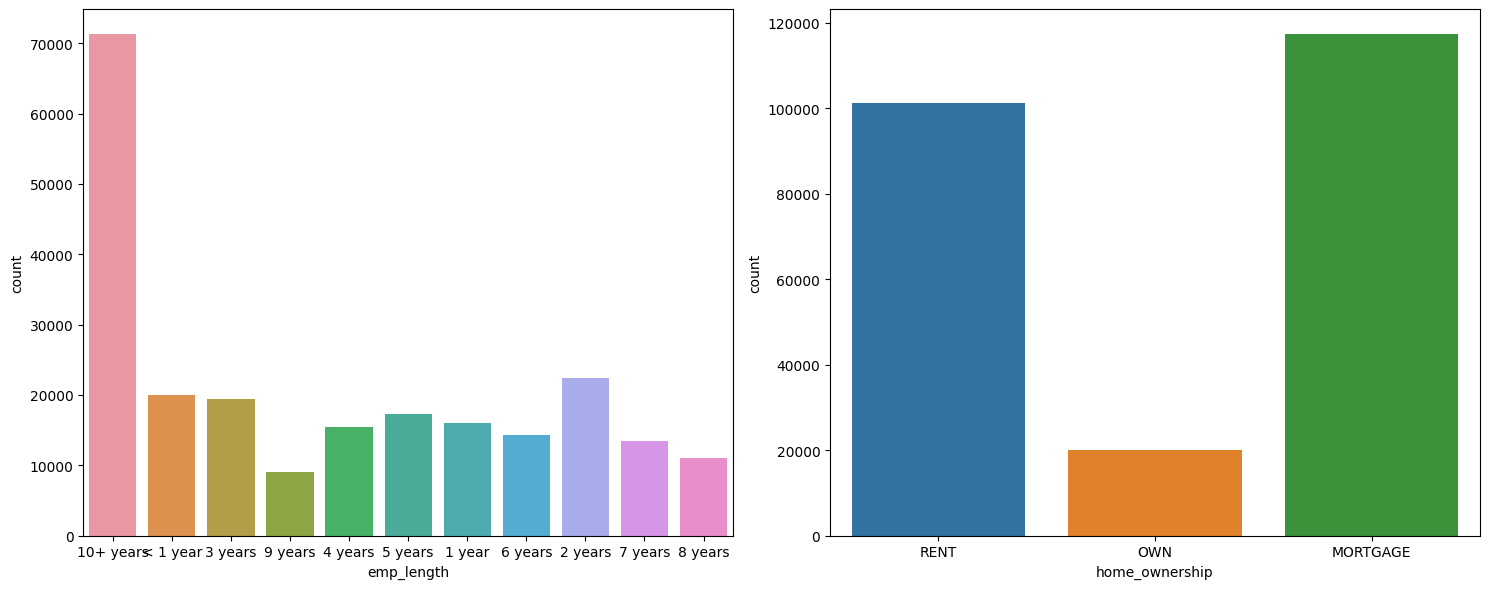

In [177]:
plt.figure(figsize=(15,6))
for i in range(0, len(cat_column_with_missing_value)):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=df1[cat_column_with_missing_value[i]])
    plt.xlabel(cat_column_with_missing_value[i])
    plt.tight_layout()

In [178]:
cat_column_with_missing_value

array(['emp_length', 'home_ownership'], dtype=object)

In [179]:
for i in cat_column_with_missing_value:
    df1[i].fillna(df1[i].mode(), inplace=True)

In [180]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = 'most_frequent')

df1[cat_column_with_missing_value] = pd.DataFrame(my_imputer.fit_transform(df1[cat_column_with_missing_value]),columns=cat_column_with_missing_value)

In [181]:
df1.isna().sum().sum()

0

In [182]:
df2=df1.copy()

In [183]:
df2[cat3].describe().T

,count,unique,top,freq
term,238913,2,36 months,186469
grade,238913,7,B,72239
emp_length,238913,11,10+ years,80537
home_ownership,238913,3,MORTGAGE,117604
verification_status,238913,3,Verified,88823
pymnt_plan,238913,2,n,238906
purpose,238913,14,debt_consolidation,139085
initial_list_status,238913,2,f,177714


In [184]:
df[num3].describe().T

,count,mean,std,min,25%,50%,75%,max
id,238913.0,8.584147e+06,9.288258e+06,54734.00,1.382529e+06,5.524581e+06,12485970.00,3.785416e+07
loan_amnt,238913.0,1.348621e+04,8.066725e+03,500.00,7.200000e+03,1.200000e+04,18000.00,3.500000e+04
funded_amnt,238913.0,1.344080e+04,8.042190e+03,500.00,7.200000e+03,1.200000e+04,18000.00,3.500000e+04
funded_amnt_inv,238913.0,1.331266e+04,8.080099e+03,0.00,7.125000e+03,1.191431e+04,18000.00,3.500000e+04
int_rate,238913.0,1.385545e+01,4.380770e+00,5.42,1.099000e+01,1.367000e+01,16.59,2.606000e+01
installment,238913.0,4.169350e+02,2.437504e+02,15.67,2.394100e+02,3.652300e+02,545.96,1.408130e+03
annual_inc,238909.0,7.192866e+04,5.510420e+04,1896.00,4.500000e+04,6.145000e+04,86000.00,7.141778e+06
loan_status,238913.0,7.815690e-01,4.131823e-01,0.00,1.000000e+00,1.000000e+00,1.00,1.000000e+00
dti,238913.0,1.643968e+01,7.698582e+00,0.00,1.072000e+01,1.614000e+01,21.88,3.999000e+01
delinq_2yrs,238884.0,2.483004e-01,7.358723e-01,0.00,0.000000e+00,0.000000e+00,0.00,2.900000e+01


### Encoding 

In [185]:
from sklearn.preprocessing import OneHotEncoder
OHE= OneHotEncoder(sparse=False)
encoded = OHE.fit_transform(df2[cat3])
features_name = OHE.get_feature_names_out(input_features=df[cat3].columns)
df_encoded[features_name] = pd.DataFrame(encoded, columns=features_name)

In [186]:
df_encoded[num3] = df2[num3]

In [187]:
df_encoded

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000,649.91,0.0,0.0,0.0,79239.0,22000.0,30.0,15.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000,357.48,0.0,0.0,0.0,79239.0,22000.0,37.0,19.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000,161.03,0.0,0.0,0.0,79239.0,22000.0,37.0,11.0
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.00,0.000,111.34,0.0,0.0,0.0,79239.0,22000.0,37.0,7.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,189.06,2.090,152.39,0.0,0.0,0.0,79239.0,22000.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238908,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1159.40,11.594,217.65,0.0,0.0,0.0,116995.0,49800.0,4.0,20.0
238909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000,563.23,0.0,0.0,0.0,42592.0,50300.0,10.0,16.0
238910,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.00,0.000,5501.60,0.0,0.0,0.0,10170.0,11100.0,20.0,14.0
238911,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.00,0.000,17.50,0.0,0.0,0.0,221830.0,39400.0,11.0,19.0


### Modelling

In [190]:
y = pd.DataFrame(df_encoded["loan_status"])
x = df_encoded.drop(columns="loan_status")

In [244]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import mutual_info_classif
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, RepeatedStratifiedKFold, train_test_split
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score, auc, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, balanced_accuracy_score, fbeta_score, precision_recall_curve, roc_curve
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import RobustScaler
from category_encoders import LeaveOneOutEncoder, MEstimateEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, OrdinalEncoder, OneHotEncoder


In [237]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=56)

#### Evaluation Function

In [205]:
def evaluate_classification(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(classification_report(y_true, y_pred))
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

#### Automodelling function

Fungsi ini digunakan untuk membentuk beberapa model yang diinginkan sekaligus dan menghitung nilai akurasinya.

In [222]:
# Create function to automate model training
def train_model(X_train, y_train, X_test, y_test):
    # Create list of models
    list_of_models = [RandomForestClassifier(random_state=56), ExtraTreesClassifier(random_state=56),  LGBMClassifier(random_state=56), CatBoostClassifier(random_state=56), RidgeClassifier(random_state=56), BernoulliNB()]

    # Create empty list to store accuracy scores, f1 scores, precision scores, recall scores
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []

    # Loop through list of models
    for model in list_of_models:
        # Fit model
        model.fit(X_train, y_train)
        # Predict
        y_pred = model.predict(X_test)
        # Append accuracy scores
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        # Append f1 scores
        f1_scores.append(f1_score(y_test, y_pred))
        # Append precision scores
        precision_scores.append(precision_score(y_test, y_pred))
        # Append recall scores
        recall_scores.append(recall_score(y_test, y_pred))

    # Create dictionary to store scores
    val = {
        "Model" : ["RandomForestClassifier", "ExtraTreesClassifier", "LGBMClassifier", "CatBoostClassifier", "RidgeClassifier", "BernoulliNB"],
        "Accuracy" : accuracy_scores,
        "F1" : f1_scores,
        "Precision" : precision_scores,
        "Recall" : recall_scores
    }

    # Return dataframe
    return pd.DataFrame(val)

In [223]:
# Call function
Result = train_model(X_train, y_train, X_test, y_test)
Result

Learning rate set to 0.091685
0:	learn: 0.5103315	total: 206ms	remaining: 3m 25s
1:	learn: 0.3433334	total: 256ms	remaining: 2m 7s
2:	learn: 0.2740045	total: 300ms	remaining: 1m 39s
3:	learn: 0.2219630	total: 342ms	remaining: 1m 25s
4:	learn: 0.1676322	total: 385ms	remaining: 1m 16s
5:	learn: 0.1412614	total: 429ms	remaining: 1m 11s
6:	learn: 0.1096245	total: 476ms	remaining: 1m 7s
7:	learn: 0.0948160	total: 519ms	remaining: 1m 4s
8:	learn: 0.0812271	total: 563ms	remaining: 1m 1s
9:	learn: 0.0734986	total: 605ms	remaining: 59.9s
10:	learn: 0.0615161	total: 647ms	remaining: 58.2s
11:	learn: 0.0554512	total: 692ms	remaining: 56.9s
12:	learn: 0.0502461	total: 735ms	remaining: 55.8s
13:	learn: 0.0439432	total: 776ms	remaining: 54.7s
14:	learn: 0.0397842	total: 820ms	remaining: 53.9s
15:	learn: 0.0380638	total: 862ms	remaining: 53s
16:	learn: 0.0347435	total: 908ms	remaining: 52.5s
17:	learn: 0.0310523	total: 949ms	remaining: 51.8s
18:	learn: 0.0281406	total: 992ms	remaining: 51.2s
19:	lear

,Model,Accuracy,F1,Precision,Recall
0,RandomForestClassifier,0.997991,0.998717,0.997492,0.999946
1,ExtraTreesClassifier,0.996652,0.997864,0.995773,0.999964
2,LGBMClassifier,0.998786,0.999225,0.998753,0.999697
3,CatBoostClassifier,0.998605,0.999109,0.998291,0.999929
4,RidgeClassifier,0.934495,0.959792,0.923210,0.999394
5,BernoulliNB,0.914279,0.947331,0.912055,0.985447


Pada tabel di atas dapat dilihat bahwa model dengan hasil yang paling baik akurasinya adalah LBGM. 

#### Cross Validation

In [226]:
# Create function to automate model training
def train_model_cv(X, y):
    # Create list of models
    list_of_models = [RandomForestClassifier(random_state=56), ExtraTreesClassifier(random_state=56),  LGBMClassifier(random_state=56), CatBoostClassifier(random_state=56), RidgeClassifier(random_state=56), BernoulliNB()]
    # Create empty list to store accuracy scores, f1 scores, precision scores, recall scores
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    # Define number of folds
    kf =  StratifiedKFold(n_splits=5, shuffle=True, random_state=14)
    # Loop through list of models
    for model in list_of_models:
         # Append accuracy scores
        accuracy_scores.append(cross_val_score(model, X, y, cv=kf, scoring='accuracy').mean())
        # Append f1 scores
        f1_scores.append(cross_val_score(model, X, y, cv=kf, scoring='f1').mean())
        # Append precision scores
        precision_scores.append(cross_val_score(model, X, y, cv=kf, scoring='precision').mean())
        # Append recall scores
        recall_scores.append(cross_val_score(model, X, y, cv=kf, scoring='recall').mean())

    # Create dictionary to store scores

    val = {
        "Model" : ["RandomForestClassifier", "ExtraTreesClassifier", "LGBMClassifier", "CatBoostClassifier", "RidgeClassifier", "BernoulliNB"],
        "Accuracy" : accuracy_scores,
        "F1" : f1_scores,
        "Precision" : precision_scores,
        "Recall" : recall_scores
    }
    # Return dataframe
    return pd.DataFrame(val)

In [228]:
# Call function
CV_Result = train_model_cv(x, y)
CV_Result

Learning rate set to 0.097064
0:	learn: 0.5018957	total: 49.5ms	remaining: 49.5s
1:	learn: 0.3303164	total: 100ms	remaining: 50s
2:	learn: 0.2577097	total: 149ms	remaining: 49.4s
3:	learn: 0.2084479	total: 199ms	remaining: 49.5s
4:	learn: 0.1562228	total: 261ms	remaining: 52s
5:	learn: 0.1299995	total: 314ms	remaining: 52s
6:	learn: 0.1098034	total: 363ms	remaining: 51.5s
7:	learn: 0.0874093	total: 418ms	remaining: 51.9s
8:	learn: 0.0777295	total: 464ms	remaining: 51.1s
9:	learn: 0.0636328	total: 516ms	remaining: 51.1s
10:	learn: 0.0565637	total: 567ms	remaining: 51s
11:	learn: 0.0502733	total: 617ms	remaining: 50.8s
12:	learn: 0.0445857	total: 660ms	remaining: 50.1s
13:	learn: 0.0383443	total: 706ms	remaining: 49.8s
14:	learn: 0.0338329	total: 754ms	remaining: 49.5s
15:	learn: 0.0306532	total: 801ms	remaining: 49.2s
16:	learn: 0.0281308	total: 850ms	remaining: 49.1s
17:	learn: 0.0267012	total: 897ms	remaining: 49s
18:	learn: 0.0255201	total: 940ms	remaining: 48.5s
19:	learn: 0.0249545

,Model,Accuracy,F1,Precision,Recall
0,RandomForestClassifier,0.997798,0.998593,0.997207,0.999984
1,ExtraTreesClassifier,0.996379,0.997689,0.995437,0.999952
2,LGBMClassifier,0.998342,0.998940,0.998550,0.999331
3,CatBoostClassifier,0.998506,0.999045,0.998118,0.999973
4,RidgeClassifier,0.935399,0.960290,0.924108,0.999422
5,BernoulliNB,0.915826,0.948264,0.912457,0.986997


Dari tabel hasil cross validation di atas, dapat dilihat bahwa model LGBM dan CatBoostClassifier memiliki nilai yang mirip dengan nilai akurasi yang sangat tinggi. Karena nilai akurasi yang sudah sangat tinggi maka tidak diperlukan hyperparameter tuning pada kedua model ini. 

### CatBoostClassifier

In [238]:
cbc_clf = CatBoostClassifier(random_state=56)
cbc_clf.fit(X_train, y_train)
y_pred = cbc_clf.predict(X_test)
evaluate_classification(y_test, y_pred)

Learning rate set to 0.091685
0:	learn: 0.5103315	total: 63.4ms	remaining: 1m 3s
1:	learn: 0.3433334	total: 126ms	remaining: 1m 2s
2:	learn: 0.2740045	total: 185ms	remaining: 1m 1s
3:	learn: 0.2219630	total: 246ms	remaining: 1m 1s
4:	learn: 0.1676322	total: 307ms	remaining: 1m 1s
5:	learn: 0.1412614	total: 366ms	remaining: 1m
6:	learn: 0.1096245	total: 425ms	remaining: 1m
7:	learn: 0.0948160	total: 483ms	remaining: 59.9s
8:	learn: 0.0812271	total: 536ms	remaining: 59s
9:	learn: 0.0734986	total: 590ms	remaining: 58.4s
10:	learn: 0.0615161	total: 644ms	remaining: 57.9s
11:	learn: 0.0554512	total: 715ms	remaining: 58.9s
12:	learn: 0.0502461	total: 780ms	remaining: 59.3s
13:	learn: 0.0439432	total: 842ms	remaining: 59.3s
14:	learn: 0.0397842	total: 899ms	remaining: 59s
15:	learn: 0.0380638	total: 951ms	remaining: 58.5s
16:	learn: 0.0347435	total: 1.01s	remaining: 58.2s
17:	learn: 0.0310523	total: 1.06s	remaining: 58s
18:	learn: 0.0281406	total: 1.12s	remaining: 57.9s
19:	learn: 0.0267291	t

{'Accuracy': 0.9986047939280632,
 'Precision': 0.9982906895999145,
 'Recall': 0.9999286618751226,
 'F1-score': 0.9991090044015182}

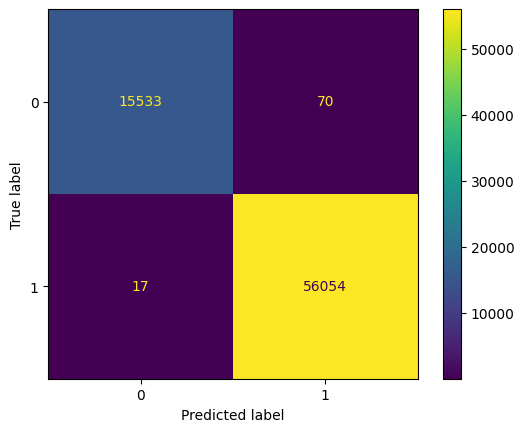

In [249]:
cm_catboost= confusion_matrix(y_test, y_pred, labels=cbc_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_catboost,
                              display_labels=cbc_clf.classes_)
disp.plot()
plt.show()

### LGBMClassifier

In [246]:
lgbm_clf = LGBMClassifier(random_state=56)
lgbm_clf.fit(X_train, y_train)
y_pred1 = lgbm_clf.predict(X_test)
evaluate_classification(y_test, y_pred1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15603
           1       1.00      1.00      1.00     56071

    accuracy                           1.00     71674
   macro avg       1.00      1.00      1.00     71674
weighted avg       1.00      1.00      1.00     71674



{'Accuracy': 0.9987861707174149,
 'Precision': 0.9987527617418573,
 'Recall': 0.9996968129692712,
 'F1-score': 0.9992245643745267}

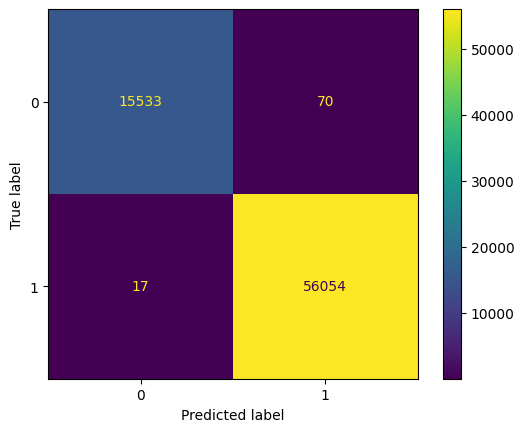

In [250]:
cm_lgbm= confusion_matrix(y_test, y_pred1, labels=lgbm_clf.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm,
                              display_labels=lgbm_clf.classes_)
disp2.plot()
plt.show()

Nilai akurasi dari CatBoostClassifier sedikit lebih tinggi dari pada LGBMClassifier. Sehingga Model CatBoostClassifier akandipilih sebagai model terbaik

#### Feature Importance

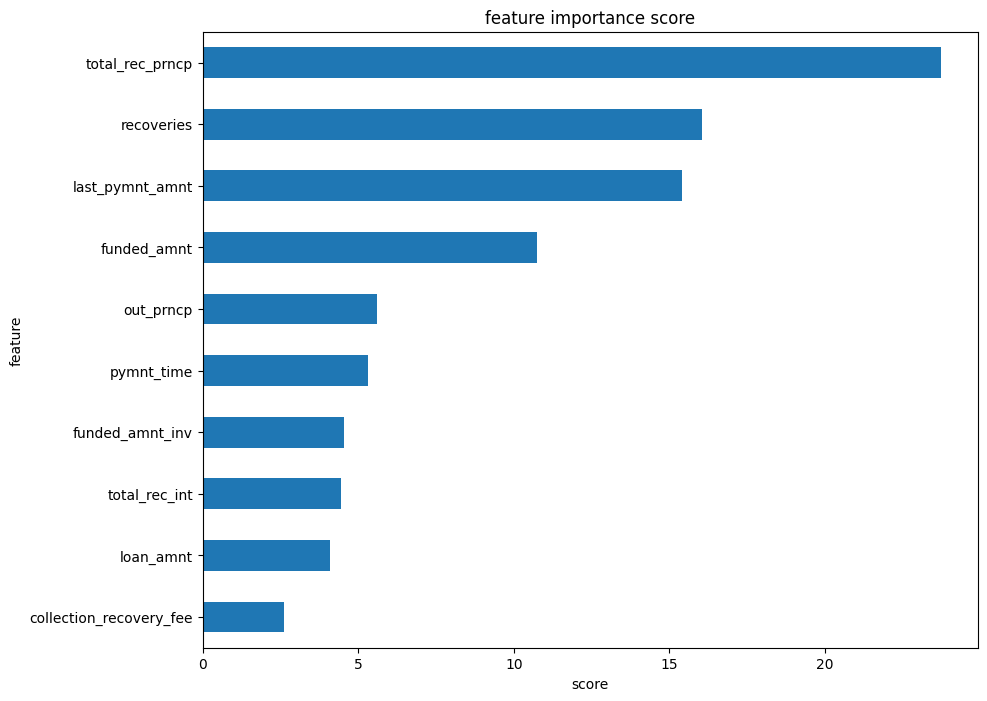

In [256]:
feat_importances = pd.Series(cbc_clf.feature_importances_, index=X_test.columns)#.best_estimator_
ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')
plt.show()